<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/semana8/module5_python_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Rodrigo Ildefonso Roman Guzman|A01794225|María de la Paz Rico Fernández|Semana 8 (Noviembre 6 2022)</h1>

<h2>Data Analysis with Python <b>Module 5</b><h2/>

<h3>Model Evaluation and Refinement</h3>
<p>Model evaluation tells how our model performs in the real world. The difference model evaluation has against smaple evaluation is that the former tells how well the model fits the data used in the train set and model evaluation is an indicator og how well the model does in test data.</p>

In [2]:
#Example of linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual

#Download the data set
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)


In [3]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()



<h2>Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>

In [4]:
y_data = df['price']
x_data=df.drop('price',axis=1)

<p>train_test_split allows us to randomly split the data into training and testing sets</p>

In [5]:
from sklearn.model_selection import train_test_split


#we choose the testing data to be 10% of the total amount of data available
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


<p>Lets try this out with our linear regression model</p>

In [6]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
print('Score for test',lre.score(x_test[['horsepower']], y_test))
print('Score for train',lre.score(x_train[['horsepower']], y_train))

Score for test 0.36358755750788263
Score for train 0.6619724197515104


<p>Given that we trained our model with a larger amount of data, the error is decreased for the train model. And thus, the R^2 is larger.</p>

<p>Using a 40% of the data for testing we get the following</p>

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=1)
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

#we get balanced values
print('Score for test',lre.score(x_test[['horsepower']], y_test))
print('Score for train',lre.score(x_train[['horsepower']], y_train))

Score for test 0.6111827529454426
Score for train 0.6755325771980134


<h2>Cross Validation</h2>

<p>Allows us to compare different machine learning methods and get a sense of how well they will perform in practive.</p>


In [8]:
from sklearn.model_selection import cross_val_score
#cv determines the number of folds (number of fraction we will split our data into)
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
print('We get a score for each fold')
print(Rcross)
#We can get the average of these scores
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

We get a score for each fold
[0.7746232  0.51716687 0.74785353 0.04839605]
The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [9]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print('These are the results for two folds')
print(Rcross)
#We can get the average of these scores
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

These are the results for two folds
[0.59015621 0.44319613]
The mean of the folds are 0.5166761697127429 and the standard deviation is 0.07348004195771385


<h3>Overfitting and Underfitting</h3>
<p>Overfitting happens when the model is too flexible and fits the noise rather than the function</p>
<p>Underfitting happens when the model is not flexible enough and does not account for the different cases</p>

In [10]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
#prediction using train
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([26091.37901214,  7954.34606626, 26091.37901214, 19557.5951667 ,
        5822.61408773])

In [11]:
#prediction using test
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11353.32523898,  5751.32764209, 11187.28797374,  6595.61698627,
       15737.79921748])

<h4>Display the data as a plot</h4>


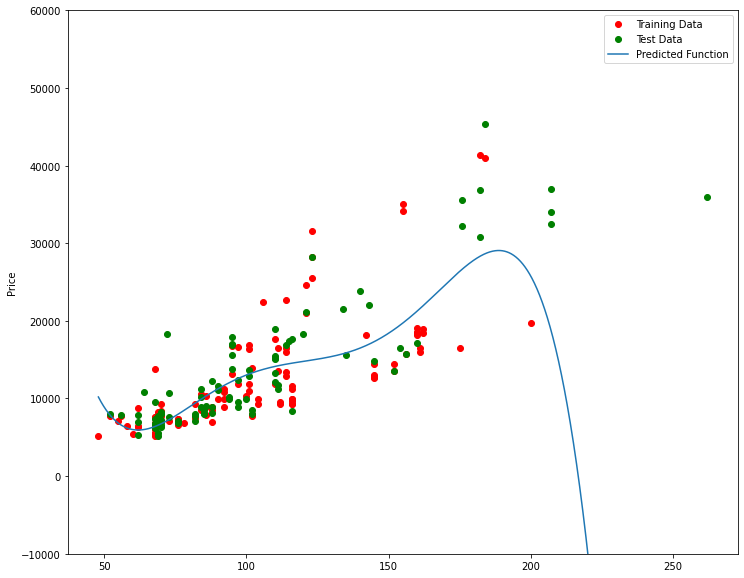

In [12]:
from sklearn.preprocessing import PolynomialFeatures

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

#Define the model we are going to use
poly = LinearRegression()
pr = PolynomialFeatures(degree=5)
poly = LinearRegression()

#train the model on training and testing sets
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

#Fit the model with the polynomial features
poly.fit(x_train_pr, y_train)


yhat = poly.predict(x_test_pr)

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)


<h3>Compare the results for training and testing</h3>
<p>Remember that the lower the R^2 the worse the model. A negative R^2 is a sign of overfitting.</p>

In [13]:
print('Results for training',poly.score(x_train_pr, y_train))
print('Results for testing',poly.score(x_test_pr, y_test))

Results for training 0.556771690212023
Results for testing -29.87134030204415


<p>The following graph is a demonstration of how well the model fits the data for a certain degree of polynomial. The models are evaluated with R^2</p>

Text(3, 0.75, 'Maximum R^2 ')

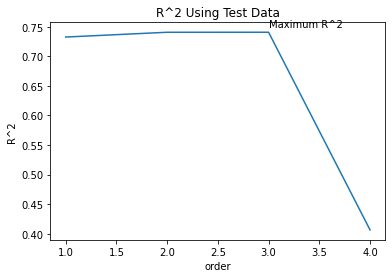

In [14]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

<h2>Ridge Regression</h2>
<p>Ridge regression controls the magnitude of the polynomials by introducing a parameter alpha. We select alpha before fittting or training the model</p>

In [17]:
from sklearn.linear_model import Ridge
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])


RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


<p>We can test the performance of the model for distinct values for alpha</p>

In [18]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:12<00:00, 77.56it/s, Test Score=0.564, Train Score=0.859]


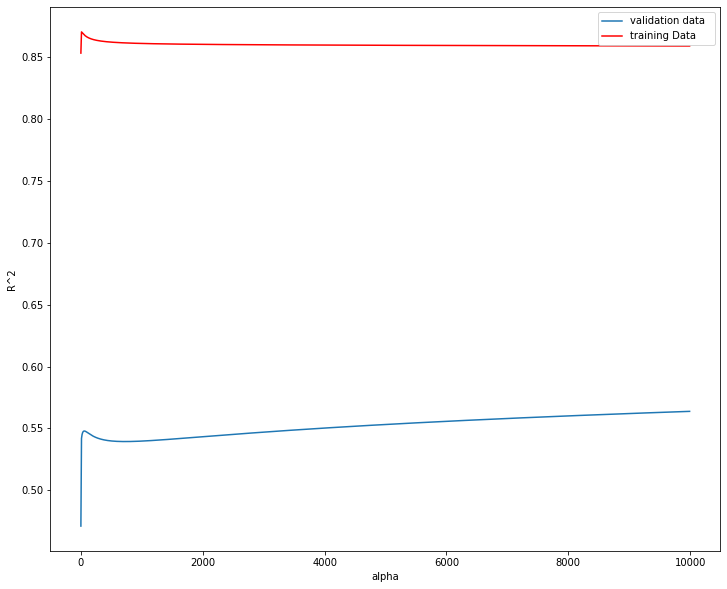

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

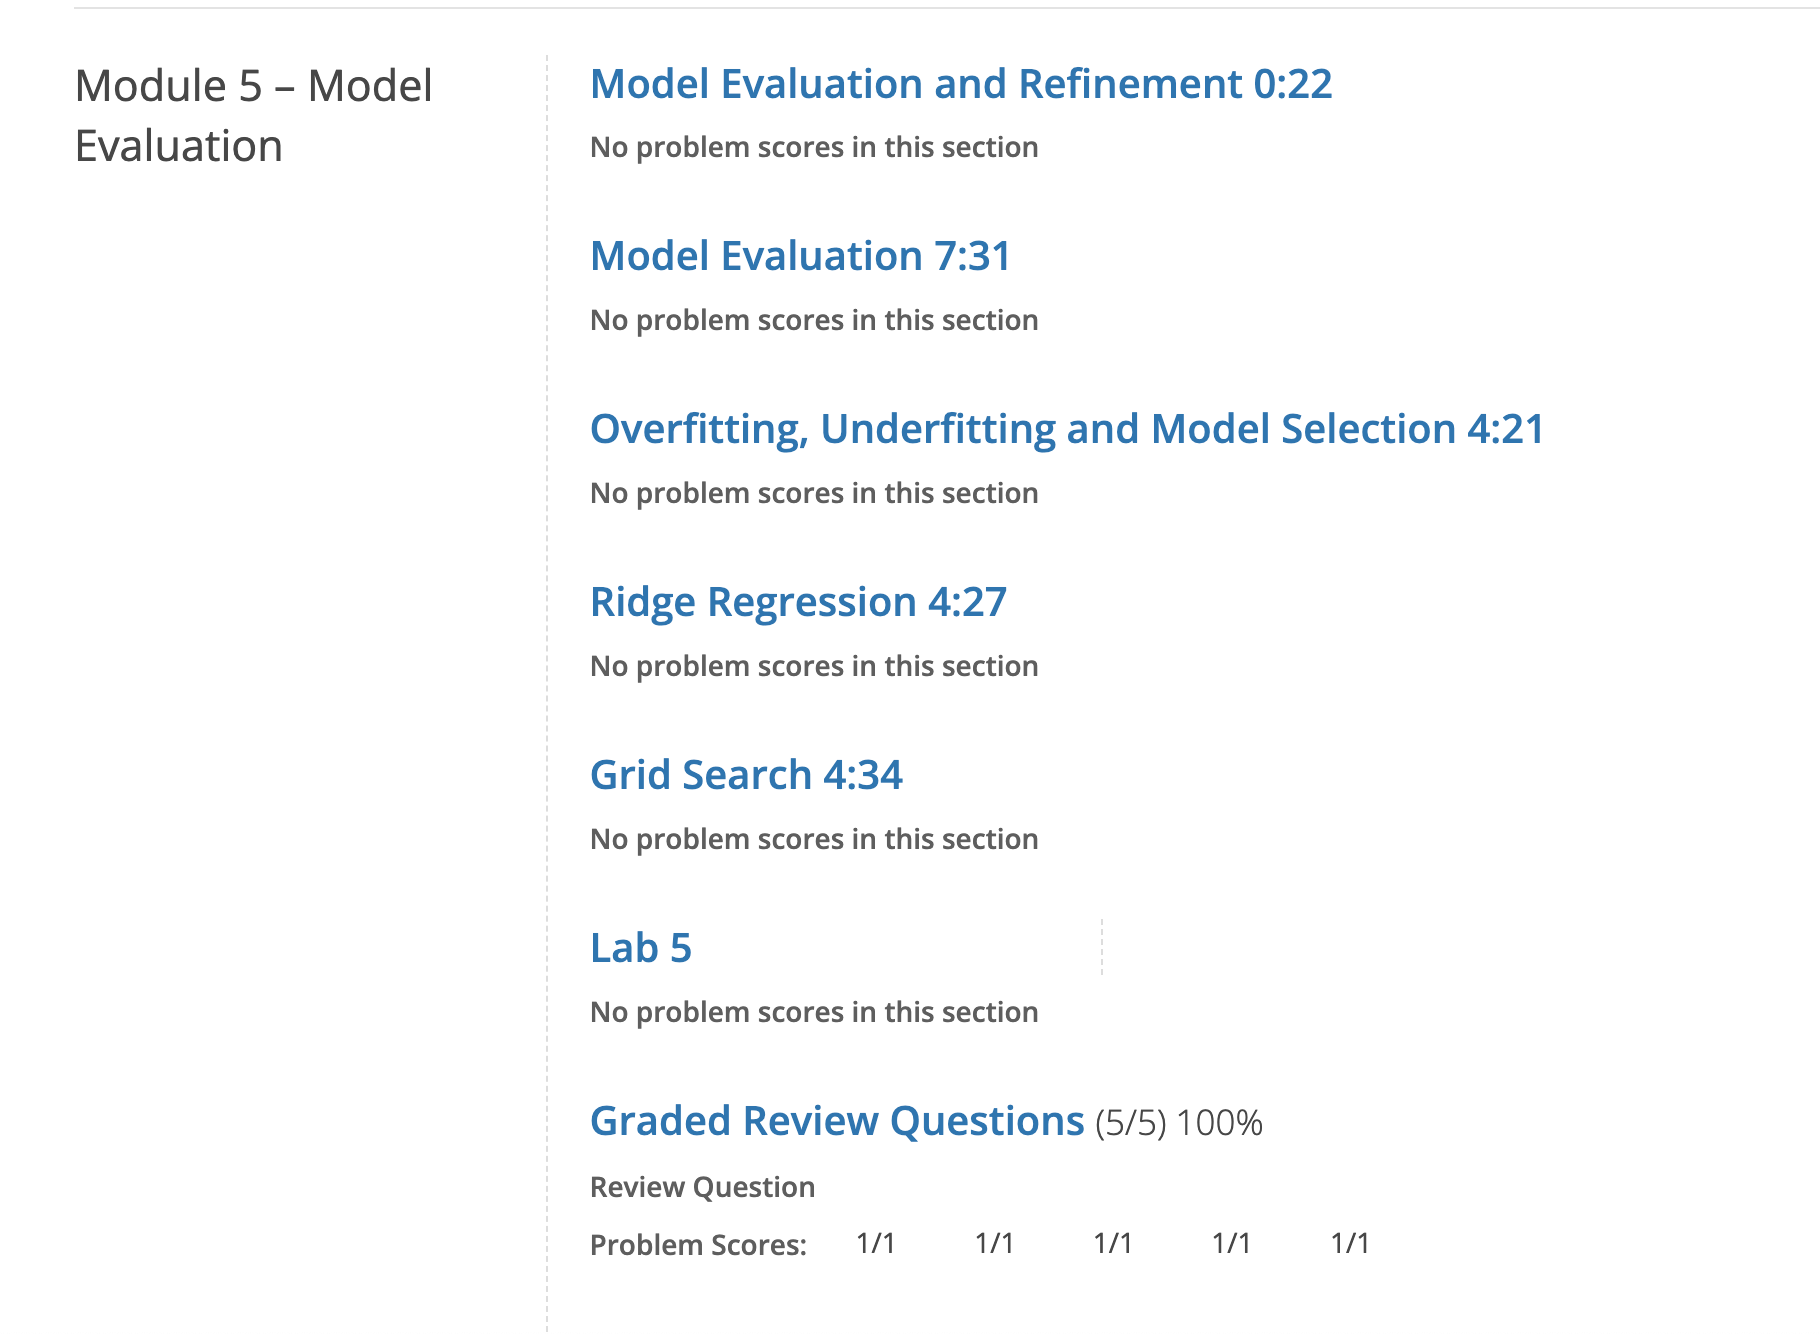